In [19]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize


In [21]:
df = pd.read_csv('data/review.csv', nrows=500000)

In [22]:
df.head()

,review_id,user_id,business_id,stars,date,text
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,2013-05-07 04:34:36,Total bill for this horrible service? Over $8G...
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,2017-01-14 21:30:33,I *adore* Travis at the Hard Rock's new Kelly ...
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,2016-11-09 20:09:03,I have to say that this office really has it t...
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,2018-01-09 20:56:38,Went in for a lunch. Steak sandwich was delici...
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,2018-01-30 23:07:38,Today was my second out of three sessions I ha...


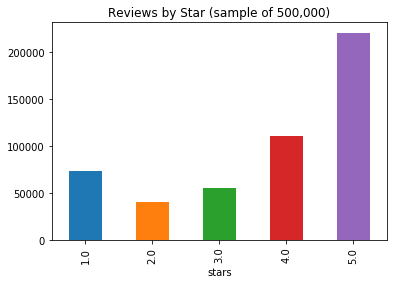

In [23]:
stars = df.groupby(df.stars).count()
stars = stars['review_id']
stars.plot.bar(title="Reviews by Star (sample of 500,000)")

In [117]:
business = pd.read_csv('data/business2.csv')

In [118]:
business.head()

,business_id,name,address,hours,is_open,categories,city,state,postal_code,latitude,longitude,review_count,stars
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,NaN,0,"Golf, Active Life",Phoenix,AZ,85016,33.522143,-112.018481,5,3.0
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,ON,L5R 3E7,43.605499,-79.652289,128,2.5
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,"Sushi Bars, Restaurants, Japanese",Charlotte,NC,28210,35.092564,-80.859132,170,4.0
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,"Insurance, Financial Services",Goodyear,AZ,85338,33.455613,-112.395596,3,5.0
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,NC,28217,35.190012,-80.887223,4,4.0


In [120]:
reviews = pd.merge(df,business,left_on=df.business_id, right_on=business.business_id)
reviews = reviews[['date','stars_x','text','name','city','state','postal_code']]
reviews.rename(columns={'stars_x':'stars'})

,date,stars,text,name,city,state,postal_code
0,2013-05-07 04:34:36,1.0,Total bill for this horrible service? Over $8G...,MountainView Hospital,Las Vegas,NV,89128
1,2017-02-09 06:45:18,4.0,My family has used this ER four times in the p...,MountainView Hospital,Las Vegas,NV,89128
2,2018-08-14 05:25:33,1.0,I have never been more disappointed by the car...,MountainView Hospital,Las Vegas,NV,89128
3,2018-05-08 19:27:59,1.0,"Went in for a broken finger, was asked if I wa...",MountainView Hospital,Las Vegas,NV,89128
4,2014-10-11 06:57:18,5.0,My mother was at Mountain View for nearly two ...,MountainView Hospital,Las Vegas,NV,89128
5,2015-10-08 03:43:11,5.0,"I really like this hospital ,they been helpful...",MountainView Hospital,Las Vegas,NV,89128
6,2016-03-07 14:41:19,1.0,I agree with what everyone else has to say abo...,MountainView Hospital,Las Vegas,NV,89128
7,2014-11-13 00:27:10,4.0,I went to the ER early Sunday morning (Nov. 2)...,MountainView Hospital,Las Vegas,NV,89128
8,2017-10-25 05:20:07,5.0,"I gave birth to my son aug 2017, I absolutely ...",MountainView Hospital,Las Vegas,NV,89128
9,2015-08-19 16:39:53,5.0,"Don't get sick. But if you do, come here.\r\nI...",MountainView Hospital,Las Vegas,NV,89128


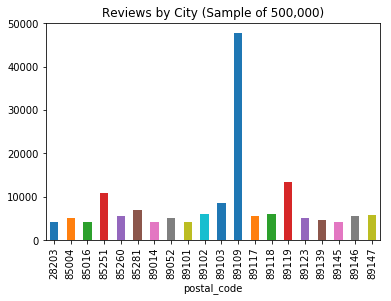

In [121]:
area = reviews.groupby(reviews.postal_code).count()['date']
area = area[area > 4000]
area.plot.bar(title="Reviews by City (Sample of 500,000)")

In [122]:
df_count = pd.DataFrame(reviews['postal_code'].value_counts())

In [156]:
new = pd.merge(reviews, df_count, left_on=reviews.postal_code, right_index=True)
new.rename(columns={'stars_x':'stars','postal_code_x':'postal_code','postal_code_y':'count'}, inplace=True)
new['count'] = pd.to_numeric(new['count'])
new['postal_code'] = pd.to_numeric(new['postal_code'], errors='coerce', downcast='signed')

new = new.dropna()
new['postal_code'] = new['postal_code'].astype('int64')

new.count()

key_0          421041
date           421041
stars          421041
text           421041
name           421041
city           421041
state          421041
postal_code    421041
count          421041
dtype: int64

In [164]:
new['date'] = pd.to_datetime(new['date'])

,key_0,date,stars,text,name,city,state,postal_code,count
0,89128,2013-05-07 04:34:36,1.0,Total bill for this horrible service? Over $8G...,MountainView Hospital,Las Vegas,NV,89128,1207
1,89128,2017-02-09 06:45:18,4.0,My family has used this ER four times in the p...,MountainView Hospital,Las Vegas,NV,89128,1207
2,89128,2018-08-14 05:25:33,1.0,I have never been more disappointed by the car...,MountainView Hospital,Las Vegas,NV,89128,1207
3,89128,2018-05-08 19:27:59,1.0,"Went in for a broken finger, was asked if I wa...",MountainView Hospital,Las Vegas,NV,89128,1207
4,89128,2014-10-11 06:57:18,5.0,My mother was at Mountain View for nearly two ...,MountainView Hospital,Las Vegas,NV,89128,1207


In [161]:
new2 = new[new['count'] > 2000]
new2.count()

key_0          257134
date           257134
stars          257134
text           257134
name           257134
city           257134
state          257134
postal_code    257134
count          257134
dtype: int64

In [178]:
minmax = pd.DataFrame(new2.groupby('postal_code').date.agg(['min','max']))
new3 = pd.merge(new2, minmax, left_on='postal_code',right_index=True)
new3.head()

key_0          257134
date           257134
stars          257134
text           257134
name           257134
city           257134
state          257134
postal_code    257134
count          257134
min            257134
max            257134
dtype: int64

In [201]:
minmax['min'] = pd.to_datetime(minmax['min'], format='%Y-%m-%d')
minmax['max'] = pd.to_datetime(minmax['max'], format='%Y-%m-%d')

,min,max
postal_code,,
15222,2005-05-26 06:33:41,2018-10-04 15:21:01
28202,2006-11-27 03:27:40,2018-10-03 15:46:58
28203,2005-06-17 01:22:15,2018-10-04 18:20:45
28209,2006-11-03 00:29:45,2018-10-04 00:43:15
28277,2006-09-13 16:15:05,2018-10-03 21:26:11


In [209]:
minmax['range'] = minmax.apply(lambda row: (row['max'] - row['min']).days, axis=1)
minmax['range'].sum()

242126

In [217]:
minmax['postal_code'] = minmax.index
minmax.head()

,min,max,range,postal_code
postal_code,,,,
15222,2005-05-26 06:33:41,2018-10-04 15:21:01,4879,15222
28202,2006-11-27 03:27:40,2018-10-03 15:46:58,4328,28202
28203,2005-06-17 01:22:15,2018-10-04 18:20:45,4857,28203
28209,2006-11-03 00:29:45,2018-10-04 00:43:15,4353,28209
28277,2006-09-13 16:15:05,2018-10-03 21:26:11,4403,28277


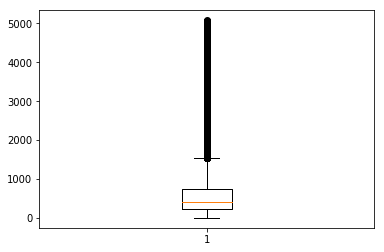

In [176]:
reviews['review_length'] = reviews.text.apply(lambda k: len(k))
fix, ax = plt.subplots()
plt.boxplot(reviews.review_length)
plt.show()